In [1]:
import warnings
warnings.filterwarnings('ignore')

# 1. 파일 불러오기

In [2]:
# 마에스트로 노트북 파일불러오기
import pandas as pd
avocado=pd.read_csv("C:/Users/CPB02GameN/Desktop/avocado project/avocado project 3/avocado_oil.csv",index_col = "Unnamed: 0")

In [3]:
avocado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,season,gasoline_price,crude_price,Day
0,2015-01-04,1.93,17328.24,2357.18,12692.21,9.47,2269.38,2269.38,0.00,0.00,organic,2015,NewYork,1,winter,3.299,92.220,4
1,2015-01-04,1.72,3788.60,384.30,1597.97,11.42,1794.91,1794.91,0.00,0.00,organic,2015,Philadelphia,1,winter,3.299,92.220,4
2,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.00,conventional,2015,Boston,1,winter,3.299,92.220,4
3,2015-01-04,0.74,1086363.97,612795.80,374420.68,9817.28,89330.21,54563.33,34760.08,6.80,conventional,2015,DallasFtWorth,1,winter,3.299,92.220,4
4,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany,1,winter,3.299,92.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24652,2020-04-19,1.49,26704.27,2794.47,1969.99,1.16,21938.65,9963.47,11975.18,0.00,organic,2020,PhoenixTucson,4,spring,2.537,64.112,19
24653,2020-04-19,1.40,1190966.77,233989.88,405008.61,2432.50,549535.78,311767.75,231680.45,6087.58,conventional,2020,BaltimoreWashington,4,spring,2.537,64.112,19
24654,2020-04-19,1.24,3587854.83,1026898.32,169835.92,104073.32,2287047.27,1193782.07,797847.80,295417.40,conventional,2020,LosAngeles,4,spring,2.537,64.112,19
24655,2020-04-19,1.53,27463.28,864.41,3943.85,93.20,22561.82,17568.92,4992.90,0.00,organic,2020,RaleighGreensboro,4,spring,2.537,64.112,19


In [4]:
# Date 변수를 datetime 타입으로 변환
avocado['Date'] = pd.to_datetime(avocado['Date'])
avocado.sort_values('Date',ignore_index = True,inplace = True)
avocado['Date'].isnull().value_counts()

False    24657
Name: Date, dtype: int64

# 2. 훈련데이터와 테스트데이터로 나누기
- 2015~2018 data로 traindata, testdata 나누기
- 2015~2018 자료로 모델을 만들고 가격 예측해보기(매개변수도 조절)
- 마지막에 2019~ 자료를 제일 적합한 모델을 가지고 예측해보고 확인하기

## 2015~2018 데이터 뽑기

In [5]:
avo1 = avocado[avocado['Date'] < '2019-01-01']
X = avo1.drop(['Date','AveragePrice'],axis=1)
X = pd.get_dummies(X)
y = avo1['AveragePrice']

In [6]:
avo1.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'month', 'season', 'gasoline_price', 'crude_price', 'Day'],
      dtype='object')

In [7]:
X.columns

Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'year', 'month', 'gasoline_price',
       'crude_price', 'Day', 'type_conventional', 'type_organic',
       'region_Albany', 'region_Atlanta', 'region_BaltimoreWashington',
       'region_Boise', 'region_Boston', 'region_BuffaloRochester',
       'region_Charlotte', 'region_Chicago', 'region_CincinnatiDayton',
       'region_Columbus', 'region_DallasFtWorth', 'region_Denver',
       'region_Detroit', 'region_GrandRapids', 'region_HarrisburgScranton',
       'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis',
       'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles',
       'region_Louisville', 'region_MiamiFtLauderdale', 'region_Nashville',
       'region_NewOrleansMobile', 'region_NewYork',
       'region_NorthernNewEngland', 'region_Orlando', 'region_Philadelphia',
       'region_PhoenixTucson', 'region_Pittsburgh', 'region_Portland',
       're

In [8]:
X

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,...,region_SouthCarolina,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_WestTexNewMexico,season_fall,season_spring,season_summer,season_winter
0,17328.24,2357.18,12692.21,9.47,2269.38,2269.38,0.00,0.00,2015,1,...,0,0,0,0,0,0,0,0,0,1
1,783068.03,30270.26,550752.19,124506.10,77539.48,72888.46,4651.02,0.00,2015,1,...,0,0,0,0,0,0,0,0,0,1
2,2288.44,1438.04,53.73,0.00,796.67,796.67,0.00,0.00,2015,1,...,0,0,0,0,0,0,0,0,0,1
3,1395.75,12.41,824.64,0.00,558.70,478.15,80.55,0.00,2015,1,...,0,0,0,0,0,0,0,0,0,1
4,3351.76,355.79,754.78,439.19,1802.00,1768.67,33.33,0.00,2015,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18532,211791.46,40462.54,105998.70,163.61,65166.61,61850.36,3314.03,2.22,2018,12,...,0,0,0,0,0,0,0,0,0,1
18533,217910.05,5320.45,169247.99,407.79,42933.82,36360.27,6573.55,0.00,2018,12,...,0,0,0,0,0,0,0,0,0,1
18534,1271797.28,511640.54,258604.03,8216.53,493336.18,294925.27,198406.47,4.44,2018,12,...,0,0,0,0,0,0,0,0,0,1
18535,140391.57,29941.08,29560.06,5353.87,75536.56,61375.38,12272.72,1888.46,2018,12,...,0,0,0,0,0,0,0,0,0,1


## 연속형 특성들 히스토그램 확인하기

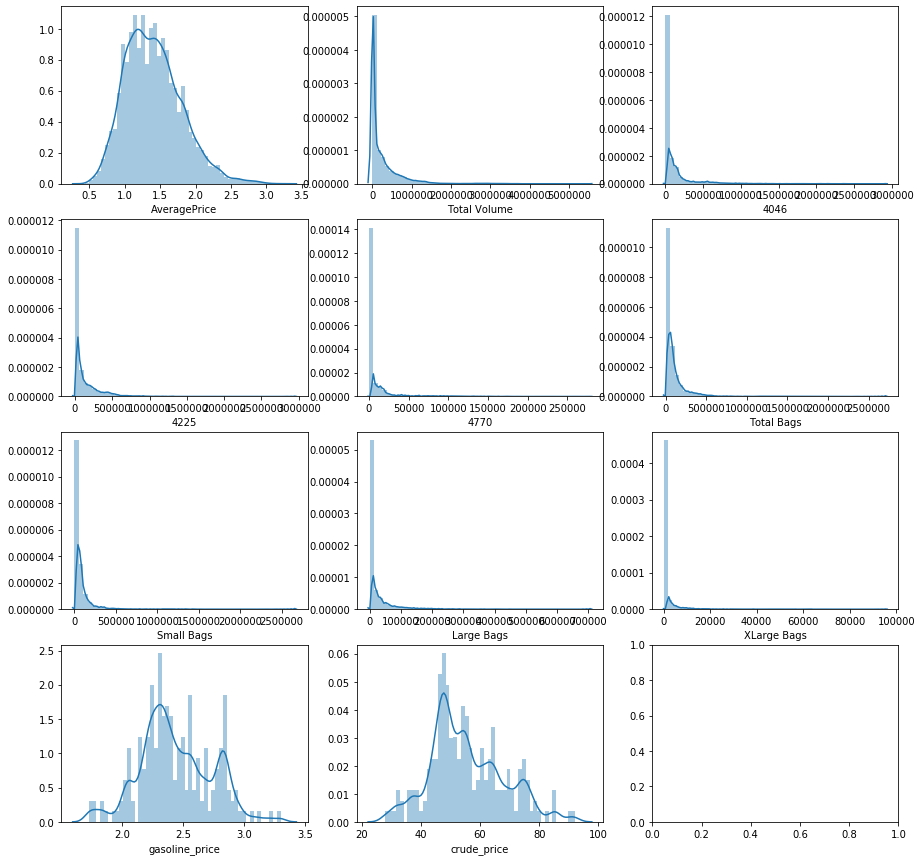

In [9]:
names =['AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags','gasoline_price', 'crude_price']

import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(4,3)
fig.set_size_inches(15,15)
axes = axes.ravel()

for names,i in zip(names,range(11)):
    sns.distplot(avo1[names],ax=axes[i])

## 연속형 특성에 log 씌우기
- 데이터 분석을 하기 위해 log를 사용하는 이유는 정규성을 높이고 분석에서 정확한 값을 얻기 위함이다.
- 데이터 간 편차를 줄여 왜도와 첨도를 줄일 수 있기 때문에 정규성이 높아진다.

In [10]:
import numpy as np
X_names = ['Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags','gasoline_price', 'crude_price']
# X 값 log 씌우기
for names in X_names:
    X[names] = np.log1p(X[names])
# Y 값 log 씌우기
y = np.log1p(y)

## log data 히스토그램 확인하기

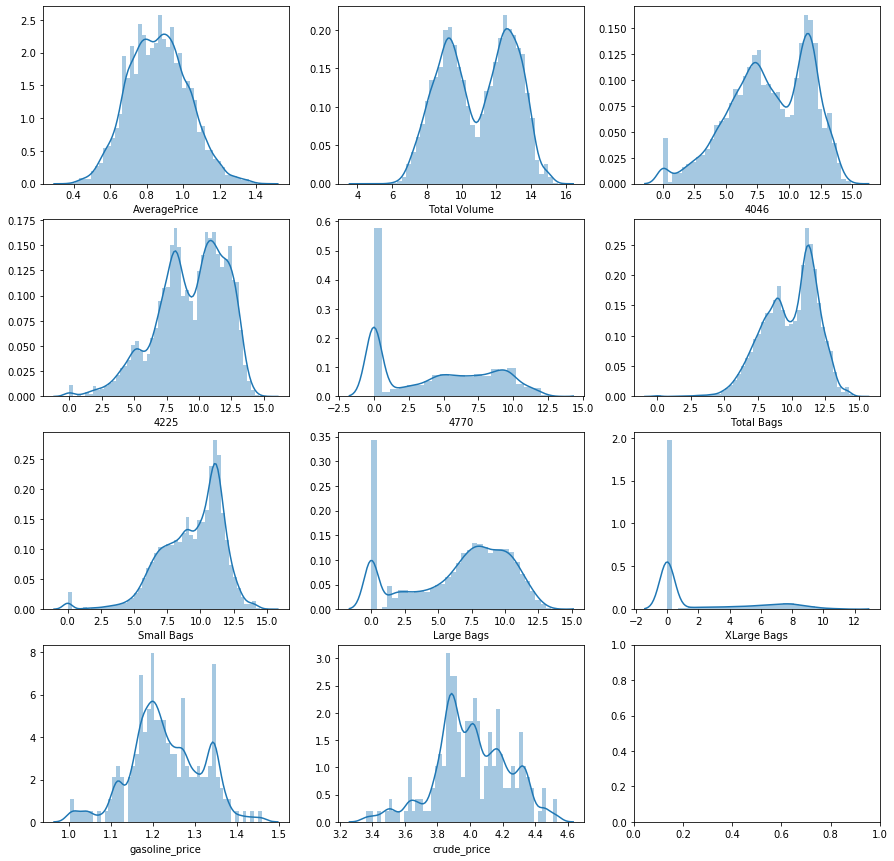

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(4,3)
fig.set_size_inches(15,15)
axes = axes.ravel()

for names,i in zip(X_names,range(10)):
    sns.distplot(X[names],ax=axes[i+1])

sns.distplot(y,ax=axes[0])

# 3. 교차검증 모델 만들기

In [12]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

In [13]:
def get_model_cv_prediction(model, X, y):
    shuffle_split = ShuffleSplit(test_size=.5,train_size = .5,n_splits= 10,random_state=0)
    Reg = cross_validate(model, X, y, scoring =["neg_mean_squared_error","r2"] ,cv= shuffle_split,return_train_score=True)
    rmse_scores = np.sqrt(-1*Reg['test_neg_mean_squared_error'])
    avg_rmse = np.mean(rmse_scores)
    avg_train = np.mean(Reg['train_r2'])
    avg_r2 = np.mean(Reg['test_r2'])
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5교차 검증 개별 RMSE :{0:.3f}'.format(np.round(avg_rmse, 3)))
    print(' 5교차 train 수정결정계수 R2 :{0:.3f}'.format(avg_train))
    print(' 5교차 test 수정결정계수 R2 :{0:.3f} '.format(avg_r2))

## 3-1. 모델 만들기

In [19]:
#2.1 선형회귀(최소제곱법)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 2.1.1  Ridge regression(리지 회귀)
#정규화
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.01,normalize=True)  # alpha값이 증가할수록 규제가 커진다.

# 2.1.2 Lasso regression(라쏘 회귀)
#정규화
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.00001,normalize=True)  # alpha값이 증가할수록 규제가 커진다.

# 2.2 결정 트리(Decision tree)
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

# 2.2.1 랜덤 포레스트 (결정 트리의 앙상블)
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 100, random_state=0,n_jobs=-1)

# 2.3 커널 서포트 벡터 머신(SVM)
from sklearn.svm import SVR
svr = SVR()

from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(n_estimators = 500,learning_rate=0.1,random_state = 0,max_depth=5)

In [20]:
models = [lr,ridge,lasso,tree,forest,gbrt ,svr]
for model in models:
    get_model_cv_prediction(model, X, y)

#####  LinearRegression  #####
 5교차 검증 개별 RMSE :0.086
 5교차 train 수정결정계수 R2 :0.727
 5교차 test 수정결정계수 R2 :0.721 
#####  Ridge  #####
 5교차 검증 개별 RMSE :0.087
 5교차 train 수정결정계수 R2 :0.721
 5교차 test 수정결정계수 R2 :0.714 
#####  Lasso  #####
 5교차 검증 개별 RMSE :0.088
 5교차 train 수정결정계수 R2 :0.714
 5교차 test 수정결정계수 R2 :0.708 
#####  DecisionTreeRegressor  #####
 5교차 검증 개별 RMSE :0.082
 5교차 train 수정결정계수 R2 :1.000
 5교차 test 수정결정계수 R2 :0.746 
#####  RandomForestRegressor  #####
 5교차 검증 개별 RMSE :0.055
 5교차 train 수정결정계수 R2 :0.984
 5교차 test 수정결정계수 R2 :0.884 
#####  GradientBoostingRegressor  #####
 5교차 검증 개별 RMSE :0.049
 5교차 train 수정결정계수 R2 :0.971
 5교차 test 수정결정계수 R2 :0.910 
#####  SVR  #####
 5교차 검증 개별 RMSE :0.135
 5교차 train 수정결정계수 R2 :0.315
 5교차 test 수정결정계수 R2 :0.312 


# 4. 스케일 조정(데이터전처리)

In [21]:
from sklearn.preprocessing import RobustScaler,QuantileTransformer

In [22]:
rb = RobustScaler()
X_rb = rb.fit_transform(X)

qt= QuantileTransformer()
X_qt = qt.fit_transform(X)

qt_normal= QuantileTransformer(output_distribution ='normal')
X_qt_normal = qt_normal.fit_transform(X)

In [23]:
models = [lr,ridge,lasso,svr]
for model in models:
    get_model_cv_prediction(model, X_rb, y)
get_model_cv_prediction(gbrt,X,y)

#####  LinearRegression  #####
 5교차 검증 개별 RMSE :0.086
 5교차 train 수정결정계수 R2 :0.727
 5교차 test 수정결정계수 R2 :0.721 
#####  Ridge  #####
 5교차 검증 개별 RMSE :0.087
 5교차 train 수정결정계수 R2 :0.721
 5교차 test 수정결정계수 R2 :0.714 
#####  Lasso  #####
 5교차 검증 개별 RMSE :0.088
 5교차 train 수정결정계수 R2 :0.714
 5교차 test 수정결정계수 R2 :0.708 
#####  SVR  #####
 5교차 검증 개별 RMSE :0.061
 5교차 train 수정결정계수 R2 :0.881
 5교차 test 수정결정계수 R2 :0.857 
#####  GradientBoostingRegressor  #####
 5교차 검증 개별 RMSE :0.049
 5교차 train 수정결정계수 R2 :0.971
 5교차 test 수정결정계수 R2 :0.910 


In [24]:
models = [lr,ridge,lasso,svr]
for model in models:
    get_model_cv_prediction(model, X_qt, y)
get_model_cv_prediction(gbrt,X,y)

#####  LinearRegression  #####
 5교차 검증 개별 RMSE :0.087
 5교차 train 수정결정계수 R2 :0.716
 5교차 test 수정결정계수 R2 :0.710 
#####  Ridge  #####
 5교차 검증 개별 RMSE :0.088
 5교차 train 수정결정계수 R2 :0.712
 5교차 test 수정결정계수 R2 :0.706 
#####  Lasso  #####
 5교차 검증 개별 RMSE :0.089
 5교차 train 수정결정계수 R2 :0.703
 5교차 test 수정결정계수 R2 :0.696 
#####  SVR  #####
 5교차 검증 개별 RMSE :0.063
 5교차 train 수정결정계수 R2 :0.870
 5교차 test 수정결정계수 R2 :0.848 
#####  GradientBoostingRegressor  #####
 5교차 검증 개별 RMSE :0.049
 5교차 train 수정결정계수 R2 :0.971
 5교차 test 수정결정계수 R2 :0.910 


In [25]:
models = [lr,ridge,lasso,svr]
for model in models:
    get_model_cv_prediction(model, X_qt_normal, y)
get_model_cv_prediction(gbrt,X,y)

#####  LinearRegression  #####
 5교차 검증 개별 RMSE :0.093
 5교차 train 수정결정계수 R2 :0.682
 5교차 test 수정결정계수 R2 :0.675 
#####  Ridge  #####
 5교차 검증 개별 RMSE :0.093
 5교차 train 수정결정계수 R2 :0.681
 5교차 test 수정결정계수 R2 :0.674 
#####  Lasso  #####
 5교차 검증 개별 RMSE :0.093
 5교차 train 수정결정계수 R2 :0.677
 5교차 test 수정결정계수 R2 :0.669 
#####  SVR  #####
 5교차 검증 개별 RMSE :0.072
 5교차 train 수정결정계수 R2 :0.829
 5교차 test 수정결정계수 R2 :0.804 
#####  GradientBoostingRegressor  #####
 5교차 검증 개별 RMSE :0.049
 5교차 train 수정결정계수 R2 :0.971
 5교차 test 수정결정계수 R2 :0.910 


# 5. GradientBoostingRegressor

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(n_estimators = 500,learning_rate=0.1,random_state = 0,max_depth=5)

In [27]:
get_model_cv_prediction(gbrt, X, y)

#####  GradientBoostingRegressor  #####
 5교차 검증 개별 RMSE :0.049
 5교차 train 수정결정계수 R2 :0.971
 5교차 test 수정결정계수 R2 :0.910 


# 6. xgboost

1. eta [default=0.3]

GBM의 학습 속도와 유사
각 단계에서 가중치를 줄여 모델을 더욱 강력하게 만듭니다.
사용되는 일반적인 최종 값 : 0.01-0.2
2. min_child_weight [default=1]

어린이에게 필요한 모든 관측치의 최소 가중치 합계를 정의합니다.
이것은 GBM의 min_child_leaf 와 유사 하지만 정확하게는 아닙니다. 이는 GBM에 최소 "관측 횟수"가있는 동안 최소 관측 값의 "가중 합계"를 나타냅니다.
과적 합을 제어하는데 사용됩니다. 값이 높을수록 모델이 트리에 대해 선택된 특정 샘플에 매우 특정한 관계를 학습하지 못합니다.
값이 너무 높으면 피팅이 부족할 수 있으므로 CV를 사용하여 조정해야합니다.
3. max_depth [default=6]

GBM과 동일한 트리의 최대 깊이입니다.
모델이 특정 샘플에 대해 매우 구체적인 관계를 학습 할 수있게 해주므로 과적 합을 제어하는데 사용됩니다.
CV를 사용하여 조정해야합니다.
일반적인 값 : 3-10
4. max_leaf_nodes

트리에서 최대 터미널 노드 또는 잎 수입니다.
max_depth 대신 정의 할 수 있습니다. 이진 트리가 생성되므로 깊이 'n'은 최대 2 ^ n의 잎을 생성합니다.
이것이 정의되면 GBM은 max_depth를 무시합니다.

5. gamma [default=0]

결과 분할이 손실 기능을 긍정적으로 줄인 경우에만 노드가 분할됩니다. 감마는 분할에 필요한 최소 손실 감소를 지정합니다.
알고리즘을 보수적으로 만듭니다. 손실 기능에 따라 값이 달라질 수 있으며 조정해야합니다.
6. max_delta_step [default=0]

최대 델타 단계에서 각 나무의 가중치 추정을 허용합니다. 값이 0으로 설정되면 제한이 없음을 의미합니다. 양수 값으로 설정하면 업데이트 단계를보다 보수적으로 만드는 데 도움이됩니다.
일반적으로이 매개 변수는 필요하지 않지만 클래스의 불균형이 클 때 로지스틱 회귀에 도움이 될 수 있습니다.
이것은 일반적으로 사용되지 않지만 원하는 경우 추가로 탐색 할 수 있습니다.
7. subsample [default=1]

GBM의 서브 샘플과 동일합니다. 관측치의 비율이 각 나무에 대해 무작위로 표본임을 나타냅니다.
값이 작을수록 알고리즘이 더 보수적이며 과적 합을 방지하지만 값이 너무 작 으면 적합하지 않을 수 있습니다.
일반적인 값 : 0.5-1
8. colsample_bytree [default=1]

GBM의 max_features와 유사합니다. 각 트리에 대해 무작위로 추출 할 열의 비율을 나타냅니다.
일반적인 값 : 0.5-1
9. colsample_bylevel [default=1]

각 수준에서 각 분할에 대한 열의 하위 샘플 비율을 나타냅니다.
subsample과 colsample_bytree가 당신을 위해 일할 것이기 때문에 나는 이것을 자주 사용하지 않습니다. 당신이 그렇게 느끼면 더 탐구 할 수 있습니다
10. lambda [default=1]

가중치에 대한 L2 정규화 기간 (Ridge Regression과 유사)
이것은 XGBoost의 정규화 부분을 처리하는 데 사용되었습니다. 많은 데이터 과학자들이 자주 사용하지 않지만 과적 합을 줄이기 위해 탐구해야합니다.
11. alpha [default=0]

체중에 대한 L1 정규화 기간 (올가미 회귀 분석과 유사)
차원이 매우 높은 경우 사용할 수있어 구현시 알고리즘이 더 빠르게 실행됩니다.
12. scale_pos_weight [default=1]

더 높은 수렴에 도움을주기 때문에 클래스 불균형이 높은 경우 0보다 큰 값을 사용해야합니다.
 

In [70]:
from xgboost import plot_importance
from xgboost import XGBRegressor
import xgboost

In [87]:
xgb_model = xgboost.XGBRegressor(n_estimators=300, scale_pos_weight=1,
                                 learning_rate=0.08,min_child_weight=1 ,
                                 subsample = 0.8,gamma=0, max_depth=5)

In [88]:
get_model_cv_prediction(xgb_model, X, y)

#####  XGBRegressor  #####
 5교차 검증 개별 RMSE :0.053
 5교차 train 수정결정계수 R2 :0.943
 5교차 test 수정결정계수 R2 :0.895 


## 6-1 max_depth, min_child_weight 매개변수 튜닝

In [89]:
from sklearn.model_selection import GridSearchCV
param_test1 = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

grid_cv = GridSearchCV(xgb_model, param_grid=param_test1, cv=5, n_jobs=-1)
grid_cv.fit(X, y)
print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: 
 {'max_depth': 7, 'min_child_weight': 3}
최고 예측 정확도: 0.6648


In [90]:
xgb_model_best = xgboost.XGBRegressor(n_estimators=300, scale_pos_weight=1,
                                 learning_rate=0.08,min_child_weight=3 ,
                                 subsample = 0.8,gamma=0, max_depth=7)

In [91]:
get_model_cv_prediction(xgb_model_best, X, y)

#####  XGBRegressor  #####
 5교차 검증 개별 RMSE :0.047
 5교차 train 수정결정계수 R2 :0.979
 5교차 test 수정결정계수 R2 :0.915 


## 6-2 gamma 매개변수 튜닝

In [92]:
param_test2 = {
    'gamma':[i/10.0 for i in range(0,5)]
}

grid_cv = GridSearchCV(xgb_model_best, param_grid=param_test2, cv=5, n_jobs=-1)
grid_cv.fit(X, y)
print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: 
 {'gamma': 0.0}
최고 예측 정확도: 0.6648


## 6-3 subsample 매개변수 튜닝


In [93]:
param_test3 = {
    'subsample':[i/100.0 for i in range(75,90,5)]
}

grid_cv = GridSearchCV(xgb_model_best, param_grid=param_test3, cv=5, n_jobs=-1)
grid_cv.fit(X, y)
print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: 
 {'subsample': 0.8}
최고 예측 정확도: 0.6648


## 6-4 reg_alpha값 조정

In [94]:
param_test4 = {
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

grid_cv = GridSearchCV(xgb_model_best, param_grid=param_test4, cv=5, n_jobs=-1)
grid_cv.fit(X, y)
print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: 
 {'reg_alpha': 1e-05}
최고 예측 정확도: 0.6569


In [95]:
xgb_model_best = xgboost.XGBRegressor(n_estimators=300, scale_pos_weight=1,
                                 learning_rate=0.08,min_child_weight=3 ,
                                 subsample = 0.8,gamma=0,
                                      reg_alpha=1e-05,max_depth=7)

In [96]:
get_model_cv_prediction(xgb_model_best, X, y)

#####  XGBRegressor  #####
 5교차 검증 개별 RMSE :0.047
 5교차 train 수정결정계수 R2 :0.979
 5교차 test 수정결정계수 R2 :0.916 


- 과대적합이 아주 조금 줄었다.

In [98]:
param_test4_1 = {
    'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05] 
}

grid_cv = GridSearchCV(xgb_model_best, param_grid=param_test4_1, cv=5, n_jobs=-1)
grid_cv.fit(X, y)
print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: 
 {'reg_alpha': 0}
최고 예측 정확도: 0.6648


In [99]:
xgb_model_best = xgboost.XGBRegressor(n_estimators=300, scale_pos_weight=1,
                                 learning_rate=0.08,min_child_weight=3 ,
                                 subsample = 0.8,gamma=0,
                                      reg_alpha=0,max_depth=7)

In [100]:
get_model_cv_prediction(xgb_model_best, X, y)

#####  XGBRegressor  #####
 5교차 검증 개별 RMSE :0.047
 5교차 train 수정결정계수 R2 :0.979
 5교차 test 수정결정계수 R2 :0.915 


# 7. Lightgbm

In [230]:
import lightgbm as lgb
lgb = lgb.LGBMRegressor(objective='regression',
                              learning_rate=0.05, n_estimators=1000)
                              
lgb.fit(X,y)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=31,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [231]:
get_model_cv_prediction(lgb, X, y)

#####  LGBMRegressor  #####
 5교차 검증 개별 RMSE :0.045
 5교차 train 수정결정계수 R2 :0.979
 5교차 test 수정결정계수 R2 :0.924 


## 7-1. learning_rate, n_estimators 매개변수 조정

In [232]:
param_test5 = {
    'learning_rate':[0.1, 0.001, 0.05, 0.01, 0.005],
    'n_estimators' :[100,500,1000]
    
}

grid_cv = GridSearchCV(lgb_final, param_grid=param_test5, cv=5, n_jobs=-1)
grid_cv.fit(X, y)
print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: 
 {'learning_rate': 0.1, 'n_estimators': 1000}
최고 예측 정확도: 0.6848


In [233]:
import lightgbm as lgb
lgb_final = lgb.LGBMRegressor(objective='regression',
                              learning_rate=0.1, n_estimators=1000)
                              
lgb_final.fit(X,y)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=31,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [234]:
get_model_cv_prediction(lgb_final, X, y)

#####  LGBMRegressor  #####
 5교차 검증 개별 RMSE :0.044
 5교차 train 수정결정계수 R2 :0.993
 5교차 test 수정결정계수 R2 :0.928 


# 8. 테스트 데이터 예측하기!

## 8-1 테스트 데이터 만들기 

In [235]:
avo2 = avocado[avocado['Date'] > '2019-01-01']
X_test = avo2.drop(['Date','AveragePrice'],axis=1)
X_test = pd.get_dummies(X_test)
y2 = avo2['AveragePrice']

In [236]:
import numpy as np
X_names = ['Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags','gasoline_price', 'crude_price']
# X 값 log 씌우기
for names in X_names:
    X_test[names] = np.log1p(X_test[names])
# Y 값 log 씌우기
y2 = np.log1p(y2)

In [237]:
rb = RobustScaler()
X_rb = rb.fit_transform(X)
X_test_rb = rb.transform(X_test)

In [238]:
from sklearn.linear_model import LinearRegression
linear_final = LinearRegression()

In [239]:
from sklearn.ensemble import RandomForestRegressor
forest_final = RandomForestRegressor(n_estimators = 100, random_state=0,n_jobs=-1)

In [240]:
xgb_model_best.fit(X,y)
lgb_final.fit(X,y)
linear_final.fit(X_rb,y)
forest_final.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [241]:
import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

#원본자료
groupBy_whole = avocado.groupby('Date').mean()
avocado_scatter = go.Scatter(x=groupBy_whole.AveragePrice.index, y=groupBy_whole.AveragePrice,name ='original')

#예측자료
avo2['AveragePrice'] = np.expm1(linear_final.predict(X_test_rb))
linear_avocado = pd.concat([avo1] + [avo2], axis = 0, ignore_index = True)
groupBy_linear = linear_avocado.groupby('Date').mean()
LINEAR = go.Scatter(x=groupBy_linear.AveragePrice.index, y=groupBy_linear.AveragePrice,name='LINEAR')

avo2['AveragePrice'] = np.expm1(forest_final.predict(X_test))
forest_avocado = pd.concat([avo1] + [avo2], axis = 0, ignore_index = True)
groupBy_forest = forest_avocado.groupby('Date').mean()
RandomForest = go.Scatter(x=groupBy_forest.AveragePrice.index, y=groupBy_forest.AveragePrice,name='RandomForest')

avo2['AveragePrice'] = np.expm1(xgb_model_best.predict(X_test))
xgb_avocado = pd.concat([avo1] + [avo2], axis = 0, ignore_index = True)
groupBy_xgb = xgb_avocado.groupby('Date').mean()
xgBoosting = go.Scatter(x=groupBy_xgb.AveragePrice.index, y=groupBy_xgb.AveragePrice,name='xgboost')

avo2['AveragePrice'] = np.expm1(lgb_final.predict(X_test))
lgb_avocado = pd.concat([avo1] + [avo2], axis = 0, ignore_index = True)
groupBy_lgb = lgb_avocado.groupby('Date').mean()
LGB = go.Scatter(x=groupBy_lgb.AveragePrice.index, y=groupBy_lgb.AveragePrice,name='LGB')

data = [avocado_scatter, LGB, LINEAR, RandomForest,xgBoosting]
layout=go.Layout(title="predict averageprice vs averageprice", xaxis={'title':'Date'}, yaxis={'title':'AveragePrices'})
figure=go.Figure(data=data,layout=layout)
iplot(figure)

In [242]:
print("Linear의 score : ",linear_final.score(X_test_rb,y2),"\n"
      "Randomforest의 score : ",forest_final.score(X_test,y2),"\n"
      "xgb의 score : ",xgb_model_best.score(X_test,y2),"\n"
      "lgb의 score : ",lgb_final.score(X_test,y2))

Linear의 score :  0.5101262031854356 
Randomforest의 score :  0.5046802937835921 
xgb의 score :  0.5992162262162954 
lgb의 score :  0.6271528884350397
